# Exploration of Etsy Listing Data for Artificial Crepe Paper Flower Products
## by Kristina Frazier

## Investigation Overview

The purpose of this project is to explore relationships between price and other variables of Etsy listings of artificial crepe paper flower products.

## Dataset Overview

The investigation explores 4,750 listings of crepe paper flower products, extracted programmatically from the Etsy API. The API call extracted the most recent 4,750 listings (as of July 2020) that included the words "crepe paper" and "flower" within any of the fields of the listing. The data consists of one main listing table with information such as the product title, description, price, when the product was made, preparation method etc. The dataset also includes two separate tables which list individual material and keyword search tags. Rows within all of the tables can be joined with a common 'listing_id' field.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
listings = pd.read_csv('data/all_main_data_clean.csv')
listing_materials = pd.read_csv('data/all_materials_data_clean.csv')
listing_tags = pd.read_csv('data/all_tag_data_clean.csv')
listings = listings.query('currency_code == "USD"')

The next few slides will walk through three visualizations that support the following observations:

1. The median price of crepe paper flower products is about 20.00 USD.
2. Wedding products are on average priced higher than non-wedding products.
3. Made-to-order wedding products have the highest median price.


## The median price of crepe paper flower products is about 20.00 USD

The distribution of prices for crepe paper flower products is heavily skewed to the right. In fact, the range of prices within this dataset was from 0.98 to 4999.90 USD. Therefore, the median price is a better measure of the center price of the listings. As we can see in the visualization the median price is just above 20.00 USD.

''

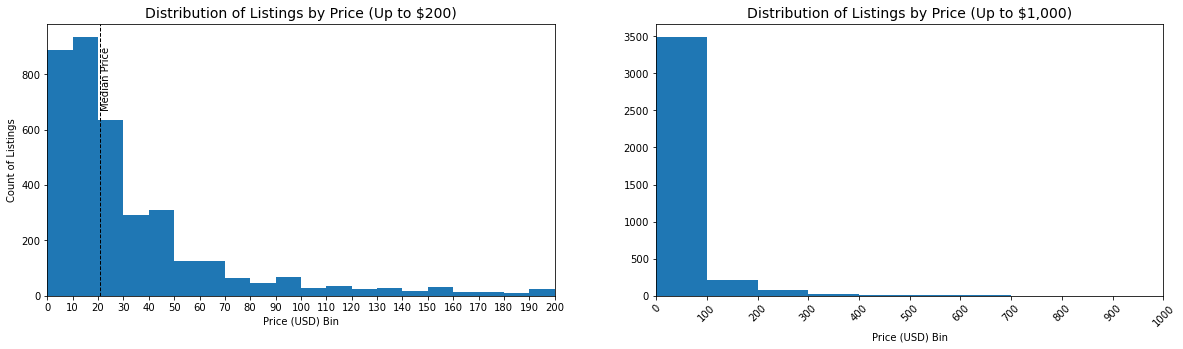

In [3]:
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
bins = np.arange(0,210,10)
plt.hist(data = listings, x = 'price', bins = bins)
plt.xlabel('Price (USD) Bin')
plt.ylabel('Count of Listings')
plt.title('Distribution of Listings by Price (Up to $200)', fontsize=14)
plt.xlim(0,200)
plt.axvline(listings['price'].median(), color='k', linestyle='dashed', linewidth=1)
plt.text(21.1,675,'Median Price',rotation=90)
ticks = bins
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.subplot(1,2,2)
bins = np.arange(0,1100,100)
plt.hist(data = listings, x = 'price', bins = bins)
plt.xlabel('Price (USD) Bin')
plt.title('Distribution of Listings by Price (Up to $1,000)', fontsize=14)
plt.xlim(0,1000)
ticks = bins
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels, rotation = 45)
;

## Wedding products are on average priced higher than non-wedding products

When stratifying listings between those which the seller has identified as a product that can be used for weddings (whether as a bouquet, centerpiece arrangement, etc.), there is a clear difference in median price between such products. Non-wedding products are generally priced higher, with a median price just below 20.00 USD. Wedding products are generally priced closer to a median of 25.00 USD. These median figures are represented by the middle dashed line of each violin distribution of price in the figure.

''

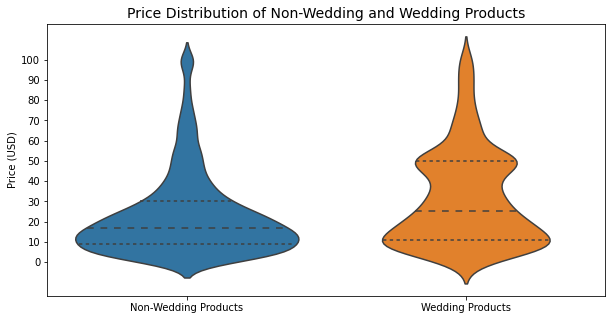

In [4]:
wedding_products = listings['description'].str.contains(r'wedding|bridal|bride')
listings['weddings'] = wedding_products
listings['weddings'] = listings['weddings'].replace(to_replace = {False:'Non-Wedding Products',True:'Wedding Products'})
listings_sub = listings.copy().query('0 < price <= 100')

plt.figure(figsize = [10,5])
sb.violinplot(data = listings_sub, x = "weddings", y = "price", inner = 'quartile')

plt.title('Price Distribution of Non-Wedding and Wedding Products', fontsize=14)
plt.ylabel('Price (USD)')

plt.yticks(ticks = np.arange(0,110,10))

#plt.axhline(listings_sub.query('weddings == "Wedding Products"')['price'].median(), color='k', linestyle='dashed', linewidth=1)
#plt.axhline(listings_sub.query('weddings == "Non-Wedding Products"')['price'].median(), color='k', linestyle='dashed', linewidth=1)

plt.xlabel('')

;

## Made-to-order wedding products have the highest median price.

Further stratification of the data between made-to-order and premade products for both wedding and non-wedding products show that the highest priced products are made-to-order wedding products. This stratification shows a right skew towards higher prices with outlier points plotted for most of the categories. However, we can still see a general higher pricing for made-to-order wedding products.

''

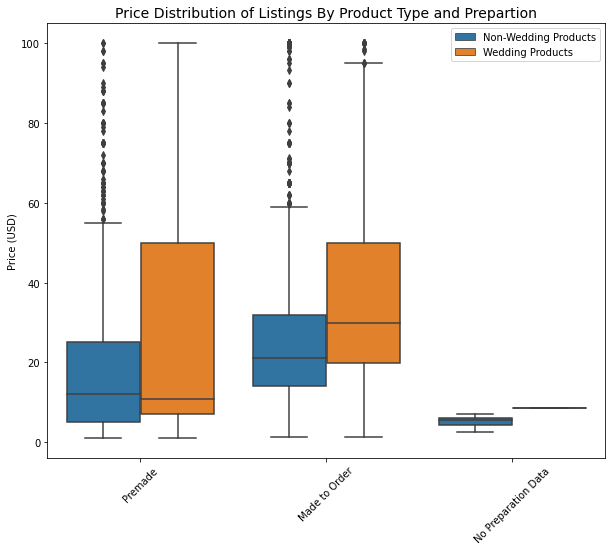

In [5]:
listings_sub['when_made_sum'] = listings_sub['when_made'].replace(to_replace = {'2020_2020': 'Premade',
                                                                                '2010_2019': 'Premade',
                                                                                '2001_2009': 'Premade',
                                                                                'before_2001': 'Premade',
                                                                                '2000_2000': 'Premade',
                                                                                '1990s': 'Premade',
                                                                                '1980s': 'Premade',
                                                                                '1970s': 'Premade',
                                                                                '1960s': 'Premade',
                                                                                '1950s': 'Premade',
                                                                                '1940s': 'Premade',
                                                                                '1930s': 'Premade',
                                                                                '1920s': 'Premade',
                                                                                '1910s': 'Premade',
                                                                                '1900s': 'Premade',
                                                                                '1800s': 'Premade', 'False':'No Preparation Data'
                                                                               ,'made_to_order':'Made to Order'})

plt.figure(figsize = [10,8])
sb.boxplot(data = listings_sub, x = "when_made_sum", y = "price", hue = 'weddings')
plt.title('Price Distribution of Listings By Product Type and Prepartion', fontsize=14)

plt.xticks(rotation = 45)

plt.legend(title = None)

plt.ylabel('Price (USD)')
plt.xlabel('')

;

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!